# Numerische Algorithmen

## Newton-Raphson-Verfahren

Eines der einfachsten und auch ältesten Verfahren zur Suche von Nullstellen von Funktionen ist das [Newton-Raphson-Verfahren](https://de.wikipedia.org/wiki/Newtonverfahren), welches bereits im 17-ten Jahrhundert entwickelt und eingestetzt wurde.

### Anwendungen
Das Finden von Nullstellen ist die Grundlage für viele Verfahren, welche z.B. für 
* das Lösen von nicht-linearen Gleichungen, 
* das Finden von Extremwerten, oder
* Optimierungsverfahren

eingesetzt werden kann.
 

### Grundidee 
Die Grundidee beruht auf einer iterativen Suche der Nullstelle $\sf x_{ns}$ einer stetig differenzierbaren Funktion $\sf f(x)$ mit Hilfe der ersten Ableitung $\sf f'(x)$. Durch das Anlegen von Tangenten an die aktuelle Näherung der Nullstelle $\sf x_i$ kann die nächste Näherung bestimmt werden. 

Bei gegebenen Startwert, $\sf x_0$ für den ersten Iterationsschritt ($\sf i=0$), können die folgenden Näherungen durch

$$\sf x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} $$

berechnet werden. Dabei bestimmt die Wahl des Startwerts, welche der ggf. mehreren Nullstellen gefunden wird. 

### Beispiel 1

Gegeben ist die Funktion $\sf f(x) = x^2 - 1$. Die Ableitung ist gegeben durch $\sf f'(x) = 2x$ und die Nullstellen lauten $\sf x_{ns} = \{-1, 1\}$.

Bei einem Startwert von $\sf x_0 = 4$ führt zu folgender Iteration:

In [1]:
import numpy as np

In [56]:
def f(x):
    return -x**2 + 1
def fp(x):
    return -2*x

x0 = 0.3

print('Startwert x_0 = {:.4f}'.format(x0))
print()

n = 5
xi = [x0]
for i in range(1,n):
    xp = xi[i-1]
    xn = xp - (f(xp)/fp(xp))
    
    print('Iterationsschritt i = {:2d}, x_i = {:.4f}'.format(i, xp))
    print('   f(x_i)  = {:.4f}'.format(f(xp)))
    print('   fp(x_i) = {:.4f}'.format(fp(xp)))
    print('   x_(i+1) = {:.4f}'.format(xn))
    print()
    
    xi.append(xn)
    
print()
print('Endergebnis nach {} Iterationen: x_(ns) = {:.4f}'.format(n, xi[-1]))

Startwert x_0 = 0.3000

Iterationsschritt i =  1, x_i = 0.3000
   f(x_i)  = 0.9100
   fp(x_i) = -0.6000
   x_(i+1) = 1.8167

Iterationsschritt i =  2, x_i = 1.8167
   f(x_i)  = -2.3003
   fp(x_i) = -3.6333
   x_(i+1) = 1.1836

Iterationsschritt i =  3, x_i = 1.1836
   f(x_i)  = -0.4008
   fp(x_i) = -2.3671
   x_(i+1) = 1.0142

Iterationsschritt i =  4, x_i = 1.0142
   f(x_i)  = -0.0287
   fp(x_i) = -2.0285
   x_(i+1) = 1.0001


Endergebnis nach 5 Iterationen: x_(ns) = 1.0001


Text(1.0142346754539993, 0.1348316666666667, 'x_3')

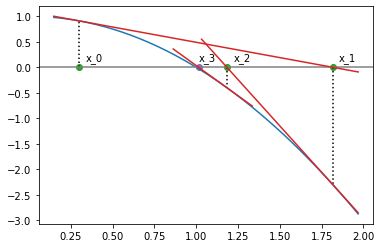

In [63]:
import matplotlib.pyplot as plt

x_start = np.min(xi)
x_end = np.max(xi)

x_d = x_end - x_start

x_start -= 0.1 * x_d
x_end += 0.1 * x_d

xarr = np.linspace(x_start, x_end, 100)

plt.plot(xarr, f(xarr))
plt.axhline(0, c='grey')

y_d = np.max(f(xarr)) - np.min(f(xarr))

n_max = 3
for i in range(n_max):
    x = xi[i]
    xn = xi[i+1]
    plt.scatter(x, 0, c='C2')
    plt.vlines(x, 0, f(x), ls=':')
    if x > xn:
        x_t1 = xn - 0.1*x_d
        x_t2 = x + 0.1*x_d
        y_t1 = - 0.1*x_d * fp(x)
        y_t2 = f(x) + 0.1*x_d * fp(x)
    else:
        x_t2 = xn + 0.1*x_d
        x_t1 = x - 0.1*x_d
        y_t2 = 0.1*x_d * fp(x)
        y_t1 = f(x) - 0.1*x_d * fp(x)
        
#     plt.plot([x, xn], [f(x), 0], c='C3')
    plt.plot([x_t1, x_t2], [y_t1, y_t2], c='C3')
    text_y = 0.035 * y_d
    plt.text(x+0.025*x_d, text_y, 'x_{}'.format(i))
plt.scatter(xi[n_max], 0, c='C4')
plt.text(xi[n_max], 0.035 * y_d, 'x_{}'.format(n_max))

## Euler-Verfahren